# Rho Statistics

## Introduction to Rho statistics

Rho statistics are a way to quantify the error on shear correlations due to PSF. They were first introduced by Rowe in 2010 ({cite}`Rowe_2010`), though they were named differently and there was only two of them. In this section, we will use the same formalism as Jarvis et al. did in a paper for DES {cite}`Jarvis_2016`, with 5 rho statistics, denoted $\rho_1$ through $\rho_5$. 
When measuring the PSF, one can only get measurements where there are stars, and thus not directly on the locations of the galaxies for which the shape is measured. This means that the PSF must be interpolated. This interpolation will lead to correlated errors on galaxies which are close to each other. As those errors are not random, independent errors, they cannot be considered as simply an additional source of noise that can be added to the uncertainty on the shear. We expect that they will introduce a systematic error on the shear, linked to the two-point correlation functions of these errors.


Under certain assumptions, we can assume that the second order moments of the observed galaxy ($I_{obs}$) correspond to the addition of the second order moments of the "true" galaxy ($I_{gal}$) and of the PSF ($I_{PSF}$), meaning that we can write 
\begin{equation}
I_{gal} = I_{obs} - I_{PSF}
\end{equation}
We can then see how the ellipticity of the galaxy relates to the ellipticity of the PSF, by writing
\begin{equation} 
\epsilon_{gal} = \frac{I_{11,gal} - I_{22,gal} + 2iI_{12,gal}}{I_{11,gal} + I_{22,gal}}
\end{equation}
and replacing the moments with the previous formula we can obtain
\begin{equation} 
\epsilon_{gal} = \frac{\epsilon_{obs}T_{obs}^2 - \epsilon_{PSF}T_{PSF}^2}{T_{obs}^2 - T_{PSF}^2}
\end{equation}
where $T = I_{11}+I_{22}$ ($\sqrt{T}$ can be considered to be a sort of radius).
To get the contribution of the PSF, we can do a partial differentiation, considering that errors relative to $T^2$ and $\epsilon_{PSF}$ will be small :
\begin{equation}
\delta\epsilon_{gal} = \frac{\partial \epsilon_{gal}}{\partial T_{PSF}^2} \delta T_{PSF}^2
                       + \frac{\partial \epsilon_{gal}}{\partial \epsilon_{PSF}} \delta \epsilon_{PSF}
\end{equation}
                       
We can compute the derivatives :
\begin{equation}
\frac{\partial \epsilon_{gal}}{\partial T_{PSF}^2} = 
\frac{\epsilon_{obs}T_{obs}^2 - \epsilon_{PSF}T_{obs}^2}{(T_{obs}^2-T_{PSF}^2)^2}
= \frac{\epsilon_{gal}-\epsilon_{PSF}}{T_{gal}}
\end{equation}

(the second step is done by adding $-\epsilon_{PSF}T_{PSF}^2+\epsilon_{PSF}T_{PSF}^2$ to the numerator) and
\begin{equation}
\frac{\partial \epsilon_{gal}}{\partial \epsilon_{PSF}} = -\frac{T_{PSF}^2}{T_{obs}^2-T_{PSF}^2} = -\frac{T_{PSF}^2}{T_{gal}^2}
\end{equation}

We can thus write

\begin{equation}
\delta\epsilon_{gal} = (\epsilon_{gal}-\epsilon_{PSF})\frac{T_{PSF}}{T_{gal}}\frac{\delta T_{PSF}}{T_{PSF}} - \frac{T_{PSF}}{T_{gal}}\delta \epsilon_{PSF}
\end{equation}


From there, we use the estimator $\hat{\epsilon}_{gal} = \epsilon_{gal} + \delta \epsilon_{gal} + \alpha \epsilon_{PSF}$ ($\delta \epsilon_{gal}$ represents the systematic error, while $\alpha \epsilon_{PSF}$ represents the impact of the PSF shape in the shape measurement algorithm, which can be non-zero even if the PSF is perfectly modelled). We can then have an estimator for the shear correlation :

\begin{align}
\hat{\xi}^+ (\theta) &= <\hat{\epsilon}_{gal}^*(x) \hat{\epsilon}_{gal}(x+\theta)> \\
	                 &= <(\epsilon_{gal}^*(x) + \delta \epsilon_{gal}^*(x) + \alpha \epsilon_{PSF}^* (\epsilon_{gal}(x+\theta) + \delta \epsilon_{gal}(x+\theta) + \alpha \epsilon_{PSF})> \\
	                 &= \underbrace{<\epsilon_{gal}^*(x)\epsilon_{gal}(x+\theta)>}_{\xi^+(\theta)} + <\epsilon_{gal}^*(x) \alpha \epsilon_{PSF}(x+\theta)> + <\epsilon_{gal}^*(x) \delta \epsilon_{gal}(x+\theta)> \\
	                 & \quad + <\alpha \epsilon_{PSF}^*(x) \epsilon_{gal}(x+\theta)> + <\alpha^2 \epsilon_{PSF}^*(x) \epsilon_{PSF}(x+\theta)> + <\alpha \epsilon_{PSF}^*(x) \delta\epsilon_{gal}(x+\theta)> \\
	                 & \quad + <\delta \epsilon_{gal}^*(x)\epsilon_{gal}(x+\theta)> + <\delta \epsilon_{gal}^*(x)  \alpha \epsilon_{PSF}(x+\theta)> + <\delta \epsilon_{gal}^*(x)\delta \epsilon_{gal}(x+\theta)>
\end{align}

We thus wish to estimate $\delta \xi^+(\theta)$. From now on we will omit the $x$ and $x+\theta$ so as to avoid cluttering the computations. We will also make two hypothesis :
- H1 : the galaxy and the PSF are not correlated, ie $<\epsilon_{gal}\epsilon_{PSF}>$ and $<\epsilon_{gal}\delta\epsilon_{PSF}>$ terms are $0$.
- H2 : separation of T and $\epsilon$

Following H1, we can already eliminate 2 terms. Since $\alpha$ is supposed to be small, we will also drop the term containing $\alpha^2$. Finally, the symmetry of the correlation reduces the number of terms to three. Let us compute the three remaining terms :

\begin{align*}
<\epsilon_{gal}^* \delta \epsilon_{gal}> &= <\epsilon_{gal}^* ((\epsilon_{gal}-\epsilon_{PSF})\frac{T_{PSF}}{T_{gal}} \frac{\delta T_{PSF}}{T_{PSF}}- \frac{T_{PSF}}{T_{gal}} \delta \epsilon_{PSF}) \\
&= <\epsilon^*_{gal} \epsilon_{gal} \frac{T_{PSF}}{T_{gal}} \frac{\delta T_{PSF}}{T_{PSF}}> - \underbrace{<\epsilon^*_{gal} \epsilon_{PSF} \frac{T_{PSF}}{T_{gal}} \frac{\delta T_{PSF}}{T_{PSF}}>}_{0~ (H1)} - \underbrace{<\epsilon^*_{gal} \delta \epsilon_{PSF} \frac{T_{PSF}}{T_{gal}}>}_{0~ (H1)} \\
&= <\frac{T_{PSF}}{T_{gal}} \frac{\delta T_{PSF}}{T_{PSF}}> \xi^+(\theta) \\
<\delta \epsilon^*_{gal}\epsilon_{gal}> &= <\frac{T_{PSF}}{T_{gal}} \frac{\delta T_{PSF}}{T_{PSF}}> \xi^+(\theta)\\
<\alpha \epsilon_{PSF}^* \delta \epsilon_{gal}> &= <\alpha\epsilon_{PSF}^* ((\epsilon_{gal}-\epsilon_{PSF})\frac{T_{PSF}}{T_{gal}} \frac{\delta T_{PSF}}{T_{PSF}}- \frac{T_{PSF}}{T_{gal}} \delta \epsilon_{PSF}) \\
&= \underbrace{<\alpha\epsilon_{PSF}^* \epsilon_{gal} \frac{T_{PSF}}{T_{gal}} \frac{\delta T_{PSF}}{T_{PSF}}>}_{0~ (H1)} - <\alpha \frac{T_{PSF}}{T_{gal}} \underbrace{\epsilon_{PSF}^* \epsilon_{PSF}  \frac{\delta T_{PSF}}{T_{PSF}}}_{\rho_5}> - <\alpha \underbrace{\epsilon_{PSF}^* \delta \epsilon_{PSF}}_{\rho_2} \frac{T_{PSF}}{T_{gal}}> \\
&= - \alpha \left< \frac{\delta T_{PSF}}{T_{gal}}\right> \rho_5(\theta) - \alpha \left< \frac{\delta T_{PSF}}{T_{gal}}\right> \rho_2(\theta)\\
<\alpha \epsilon_{PSF}^* \delta \epsilon_{gal}> &= - \alpha \left< \frac{\delta T_{PSF}}{T_{gal}}\right> \rho_5(\theta) - \alpha \left< \frac{\delta T_{PSF}}{T_{gal}}\right> \rho_2(\theta)\\
<\delta \epsilon^*_{gal} \delta \epsilon_{gal}> &=  <((\epsilon_{gal}^*-\epsilon_{PSF}^*)\frac{T_{PSF}}{T_{gal}} \frac{\delta T_{PSF}}{T_{PSF}}- \frac{T_{PSF}}{T_{gal}} \delta \epsilon^*_{PSF})((\epsilon_{gal}-\epsilon_{PSF})\frac{T_{PSF}}{T_{gal}} \frac{\delta T_{PSF}}{T_{PSF}}- \frac{T_{PSF}}{T_{gal}} \delta \epsilon_{PSF})> \\
&= <\left(\frac{T_{PSF}}{T_{gal}}\right)^2 (\underbrace{\epsilon_{gal}^* \epsilon_{gal}}_{\xi^+} - \underbrace{\epsilon_{PSF}^* \epsilon_{gal}}_{0~ (H1)} - \underbrace{\epsilon_{gal}^* \epsilon_{PSF}}_{0~ (H1)} + \underbrace{\epsilon_{PSF}^* \epsilon_{PSF})\left(\frac{\delta T_{PSF}}{T_{PSF}}\right)^2}_{\rho_3}> \\
&  \quad - <(\underbrace{\epsilon_{gal}^* \delta \epsilon_{PSF}}_{0~ (H1)} - \underbrace{\epsilon_{PSF}^* \delta \epsilon_{PSF}) \frac{\delta T_{PSF}}{T_{PSF}}}_{\rho_4} \left(\frac{T_{PSF}}{T_{gal}}\right)^2> \\
& \quad -< (\underbrace{\delta \epsilon_{PSF}^* \epsilon_{gal}}_{0~ (H1)} - \underbrace{\delta \epsilon_{PSF}^* \epsilon_{PSF})  \frac{\delta T_{PSF}}{T_{PSF}}}_{\rho_4} \left(\frac{T_{PSF}}{T_{gal}}\right)^2> \\
&  \quad + <\left(\frac{T_{PSF}}{T_{gal}}\right)^2 \underbrace{\delta \epsilon_{PSF}^* \delta \epsilon_{PSF}}_{\rho_1}> \\
& = \left<\frac{T_{PSF}}{T_{gal}}\right>^2 \rho_1(\theta) + \left<\frac{T_{PSF}}{T_{gal}}\right>^2 \rho_3(\theta) + 2 \left<\frac{T_{PSF}}{T_{gal}}\right>^2 \rho_4(\theta) \\
& \quad + \underbrace{<\left(\frac{\delta T_{PSF}}{T_{gal}}\right)^2> \xi_+(\theta)}_{\text{negligible}}
\end{align*}

Finally, we get 
\begin{align*}
\delta \xi^+(\theta) &= 2<\frac{T_{PSF}}{T_{gal}} \frac{\delta T_{PSF}}{T_{PSF}}> \xi^+(\theta) + \left<\frac{T_{PSF}}{T_{gal}}\right>^2 \rho_1(\theta) + \left<\frac{T_{PSF}}{T_{gal}}\right>^2 \rho_3(\theta) + 2 \left<\frac{T_{PSF}}{T_{gal}}\right>^2 \rho_4(\theta) \\ 
&\quad - 2\alpha \left< \frac{\delta T_{PSF}}{T_{gal}}\right> \rho_5(\theta) - 2\alpha \left< \frac{\delta T_{PSF}}{T_{gal}}\right> \rho_2(\theta)
\end{align*}

We can notice that the formula here is slightly different from the one in the Jarvis paper, as there are factors of two in front of $\rho_2$,$\rho_4$ and $\rho_5$; however these are ultimately unimportant since the precise coefficients will be measured from the data anyway.

We thus get the definition of the five rho statistics :

\begin{align*}
\rho_1(\theta) &= <\delta \epsilon_{PSF}^* (x) \delta \epsilon_{PSF} (x+\theta)> \\
\rho_2(\theta) &= <\epsilon_{PSF}^* (x) \delta \epsilon_{PSF} (x+\theta)> \\
\rho_3(\theta) &= <\left(\epsilon_{PSF}^* \frac{\delta T_{PSF}}{T_{PSF}}\right) (x) \left(\epsilon_{PSF} \frac{\delta T_{PSF}}{T_{PSF}}\right) (x+\theta)> \\
\rho_4(\theta) &= <\delta \epsilon_{PSF}^* (x) \left(\epsilon_{PSF} \frac{\delta T_{PSF}}{T_{PSF}}\right) (x+\theta)> \\
\rho_5(\theta) &= <\epsilon_{PSF}^* (x) \left(\epsilon_{PSF} \frac{\delta T_{PSF}}{T_{PSF}}\right) (x+\theta)> \\
\end{align*}



In [1]:
import galsim
import os
import numpy as np
import fitsio
import piff
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

def setup(sigma = 1.3,g1 = 0.15,g2 = 0,du = 0,dv = 0,flux = 123.45,stamp_size=2048,n_stars=5000):
    """Build an input image and catalog used by a few tests below.
    """
    wcs = galsim.TanWCS(
            #galsim.AffineTransform(0.2, 0.05, -0.08, -0.24, galsim.PositionD(1024,1024)),
            galsim.AffineTransform(0.2, 0., 0., 0.2, galsim.PositionD(stamp_size,stamp_size)),
            galsim.CelestialCoord(5 * galsim.arcmin, -25 * galsim.degrees)
            )    
    image = galsim.Image(stamp_size, stamp_size, wcs=wcs)

    # Where to put the stars.
    point_array = np.round(np.random.uniform(33,stamp_size-33,size=(n_stars,2)),2)
    
    x_list = point_array[:,0]
    y_list = point_array[:,1]
    # Draw a Gaussian PSF at each location on the image.
    
    for x, y in zip(x_list, y_list):
        psf = galsim.Gaussian(sigma=sigma).shear(g1=g1, g2=g2).shift(du,dv) * flux #*(stamp_size-x)/stamp_size
        image2 = galsim.Image(stamp_size, stamp_size, wcs=wcs)
        bounds = galsim.BoundsI(int(x-31), int(x+32), int(y-31), int(y+32))
        offset = galsim.PositionD(x-int(x)-0.5, y-int(y)-0.5)
        psf.drawImage(image=image2, method='no_pixel', offset=offset)
        image += image2
    image.addNoise(galsim.GaussianNoise(rng=galsim.BaseDeviate(1234), sigma=1e-6))
    plt.figure(figsize=(10,10))
    plt.imshow(image.array)
    plt.show()
    # Write out the image to a file
    image_file = os.path.join('output','test_stats_image.fits')
    image.write(image_file)

    # Write out the catalog to a file
    dtype = [ ('x','f8'), ('y','f8') ]
    data = np.empty(len(x_list), dtype=dtype)
    data['x'] = x_list
    data['y'] = y_list
    cat_file = os.path.join('output','test_stats_cat.fits')
    fitsio.write(cat_file, data, clobber=True)

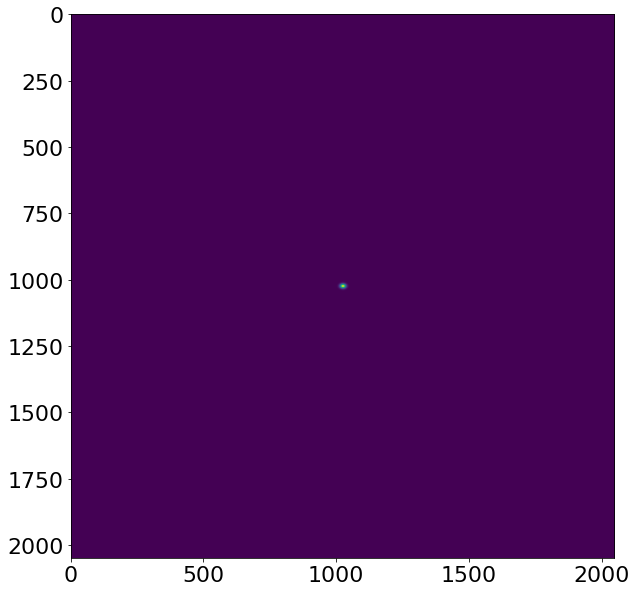

In [2]:
setup()

In [3]:
logger = piff.config.setup_logger(verbose=2)
image_file = os.path.join('output','test_stats_image.fits')
cat_file = os.path.join('output','test_stats_cat.fits')
psf_file = os.path.join('output','test_rhostats.fits')
rho_file = os.path.join('output','test_rhostats.pdf')
config = {
    'input' : {
        'image_file_name' : image_file,
        'cat_file_name' : cat_file,
        'stamp_size' : 48
    }
}
#piff.piffify(config, logger)

# Test rho statistics directly.
min_sep = 20
max_sep = 1000
bin_size = 0.2

In [4]:
def plot_single(ax, rho, color, marker, offset=0., num=1):
        # Add a single rho stat to the plot.
        meanr = rho.meanr * (1. + rho.bin_size * offset)
        xip = rho.xip
        sig = np.sqrt(rho.varxip)
        ax.plot(meanr, xip, color=color,label=r'$\rho_{}(\theta)$'.format(num))
        ax.plot(meanr, -xip, color=color, ls=':')
        ax.errorbar(meanr[xip>0], xip[xip>0], yerr=sig[xip>0], color=color, ls='', marker=marker)
        ax.errorbar(meanr[xip<0], -xip[xip<0], yerr=sig[xip<0], color=color, ls='', marker=marker,
                    fillstyle='none', mfc='white')
        #return ax.errorbar(-meanr, xip, yerr=sig, color=color, marker=marker)
        
def compute_rho_stats_mean(sigma,g1,g2,du,dv,flux,plot=False):
    galsim_psf = galsim.Gaussian(sigma=sigma).shear(g1=g1, g2=g2).shift(du,dv) * flux
    model_psf = piff.GSObjectModel(galsim_psf)
    model_interp = piff.Mean()
    psf = piff.SimplePSF(model_psf,model_interp)
    orig_stars, wcs, pointing = piff.Input.process(config['input'], logger)
    stats = piff.RhoStats(min_sep=min_sep, max_sep=max_sep, bin_size=bin_size, sep_units="arcsec")
    stats.compute(psf, orig_stars)

    rhos = [stats.rho1, stats.rho2, stats.rho3, stats.rho4, stats.rho5]

    if plot:
        fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
        ax1.set_xlabel(r'$\theta$ (arcmin)')
        ax1.set_ylabel(r'$\rho(\theta)$')
        ax1.set_xlim(30,600)
        ax1.set_xscale('log')
        ax1.set_yscale('log', nonposy='clip')
        ax2.set_xlabel(r'$\theta$ (arcmin)')
        ax2.set_ylabel(r'$\rho(\theta)$')
        ax2.set_xlim(30,600)
        ax2.set_xscale('log')
        ax2.set_yscale('log', nonposy='clip')
        plot_single(ax1,rhos[0],"red","x",num=1)
        plot_single(ax1,rhos[2],"blue","x",0.1,num=3)
        plot_single(ax1,rhos[3],"green","x",0.2,num=4)
        plot_single(ax2,rhos[1],"red","x",num=2)
        plot_single(ax2,rhos[4],"blue","x",num=5)
        ax1.legend()
        ax2.legend()
        plt.show()
        
    return [np.abs(np.mean(rho.xip)) for rho in rhos]

First, let's compute the rho statistics with a reference PSF (slightly different from the original graph so as to get a cleaner plot.

Reading in 1 images
Getting wcs from image file output/test_stats_image.fits
Setting pointing to image center: 0.010 h, -25.057 d
Reading image file output/test_stats_image.fits
Reading star catalog output/test_stats_cat.fits.
Processing catalog 0 with 5000 stars
Read a total of 5000 stars from 1 image
/home/thuiop/Documents/stageAPC/Shear-and-PSF-Reading-Group/env/lib64/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/home/thuiop/Documents/stageAPC/Shear-and-PSF-Reading-Group/env/lib64/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


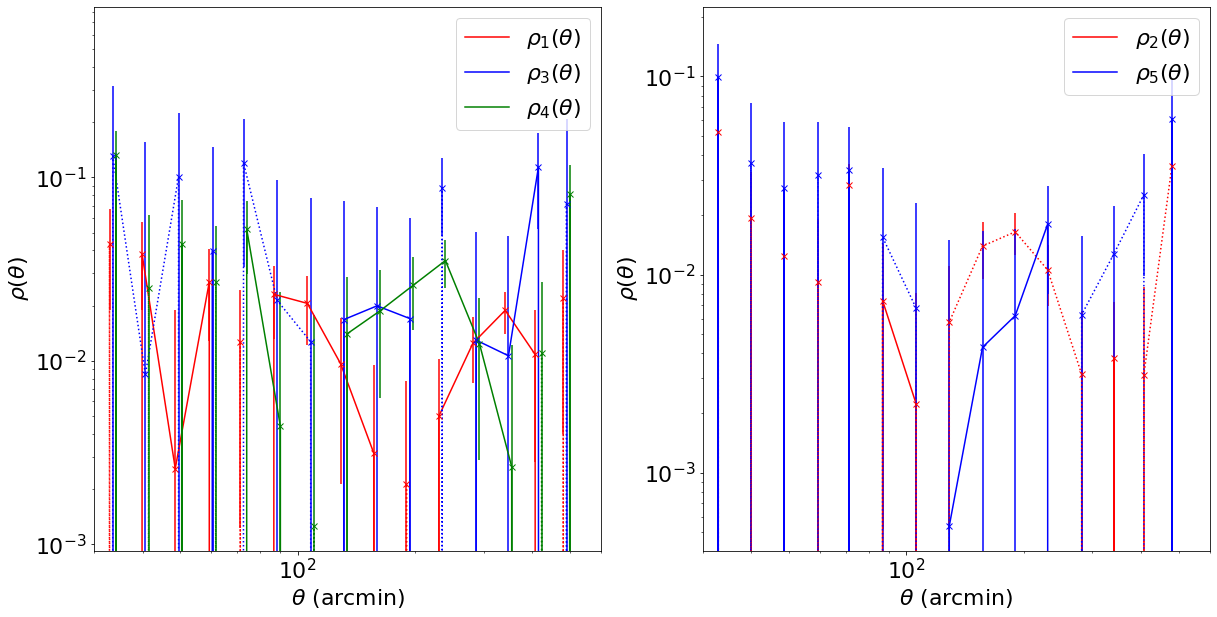

[0.006768296513179221, 0.005931728170745178, 0.011564446342164737, 0.011855847624885878, 0.0016527952320356785]


In [5]:
sigma = 1.6
g1 = 0.15
g2 = -0
du = 0.  # in arcsec
dv = 0.
flux = 123.45
ref_rho_stats = compute_rho_stats_mean(sigma,g1,g2,du,dv,flux,plot=True)
print(ref_rho_stats)

Now, let's see what happens if we give it a higher ellipticity, say by augmenting the first component. We expect that this will increase the $\delta_{PSF}$ terms, while the $e_{PSF}$ will not change (as the real PSF stays the same) ; thus we should expect that only $\rho_1$, $\rho_2$ and $\rho_4$ will increase, and $\rho_1$ the most of all  (please note that $\delta T_{PSF}$ should not change by much either).

In [ ]:
sigma = 1.6
g1 = 0.2
g2 = -0
du = 0.  # in arcsec
dv = 0.
flux = 123.45
high_ellipticity_rho_stats = compute_rho_stats_mean(sigma,g1,g2,du,dv,flux,plot=False)
print(high_ellipticity_rho_stats)
print([high_ellipticity_rho_stats[i]/ref_rho_stats[i] for i in range(5)])

Indeed, we obtain a result according to expectations. Let's now see the impact of changing the size of the PSF (without changing the ellipticity). This should only affect $\rho_3$, $\rho_4$ and $\rho_5$ since $\rho_1$ and $\rho_2$ do not contain the $\delta T_{PSF}$ factor which evaluates the error in size (and again, $\rho_3$ should be the most impacted).

In [7]:
sigma = 1.9
g1 = 0.15
g2 = -0
du = 0.  # in arcsec
dv = 0.
flux = 123.45
high_size_rho_stats = compute_rho_stats_mean(sigma,g1,g2,du,dv,flux,plot=False)
print(high_size_rho_stats)
print([high_size_rho_stats[i]/ref_rho_stats[i] for i in range(5)])

Reading in 1 images
Getting wcs from image file output/test_stats_image.fits
Setting pointing to image center: 0.010 h, -25.057 d
Reading image file output/test_stats_image.fits
Reading star catalog output/test_stats_cat.fits.
Processing catalog 0 with 5000 stars
Read a total of 5000 stars from 1 image


[0.030277081793397602, 0.009069701931870362, 0.01090240415063487, 0.02011790860188472, 0.012730001342675485]
[0.9246192911387641, 0.9722332564947164, 2.309218604230213, 1.2535852630531314, 1.255774612971742]


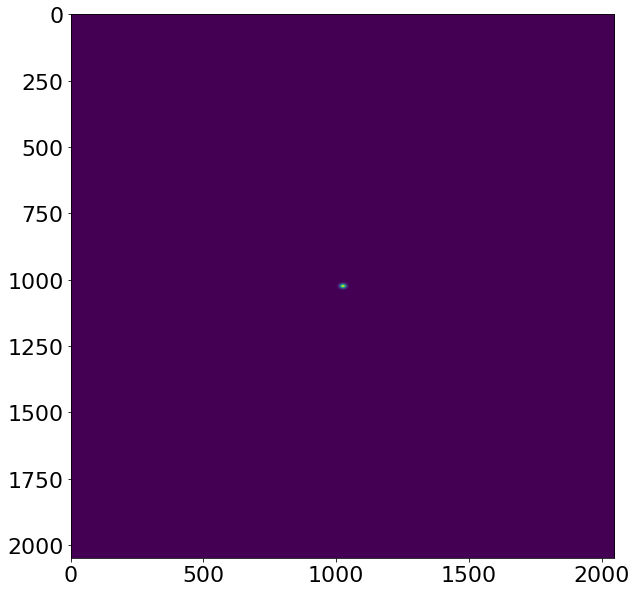

Reading in 1 images
Getting wcs from image file output/test_stats_image.fits
Setting pointing to image center: 0.010 h, -25.057 d
Reading image file output/test_stats_image.fits
Reading star catalog output/test_stats_cat.fits.
Processing catalog 0 with 5000 stars
Read a total of 5000 stars from 1 image


[0.044049193286167874, 0.006051980249371881, 0.0367068454113745, 0.0178685666720736, 0.00329045123090973]
[1.345200113716788, 0.648746398755702, 7.774810872481957, 1.113424476433664, 0.32459266969170764]


In [8]:
setup(g1=0.2)
sigma = 1.6
g1 = 0.2
g2 = 0
du = 0.  # in arcsec
dv = 0.
flux = 123.45
high_true_ellipticity_rho_stats = compute_rho_stats_mean(sigma,g1,g2,du,dv,flux,plot=False)
print(high_true_ellipticity_rho_stats)
print([high_true_ellipticity_rho_stats[i]/ref_rho_stats[i] for i in range(5)])

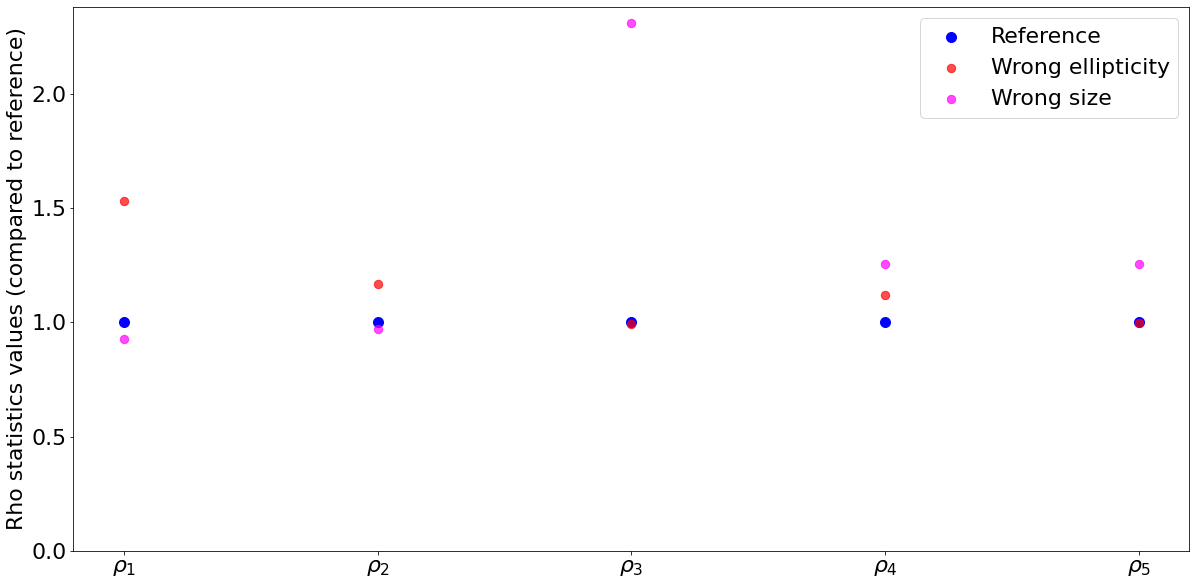

In [9]:
x = [r"$\rho_1$",r"$\rho_2$",r"$\rho_3$",r"$\rho_4$",r"$\rho_5$"]
plt.figure(figsize=(20,10))
plt.scatter(x,[1.0 for i in range(5)],marker="o",s=100,color="blue",label="Reference")
plt.scatter(x,[high_ellipticity_rho_stats[i]/ref_rho_stats[i] for i in range(5)],marker="o",s=70,color="red",label="Wrong ellipticity",alpha=0.7)
plt.scatter(x,[high_size_rho_stats[i]/ref_rho_stats[i] for i in range(5)],marker="o",s=70,color="magenta",label="Wrong size",alpha=0.7)
plt.ylabel("Rho statistics values (compared to reference)")
plt.ylim(0)
plt.legend()
plt.show()

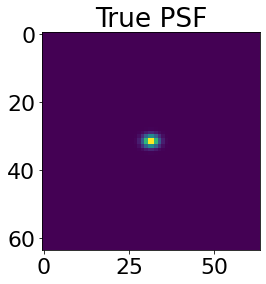

In [10]:
sigma = 1.3
g1 = 0.15
g2 = -0
du = 0.  # in arcsec
dv = -0.
flux = 123.45
psf_gal = galsim.Gaussian(sigma=sigma).shear(g1=g1, g2=g2).shift(du,dv) * flux
image = galsim.Image(64,64,scale=1.0)
psf_gal.drawImage(image)
plt.imshow(image.array)
plt.title("True PSF")
plt.show()

In [11]:
star = piff.Star.makeTarget(x=32,y=32)
star = psf.interpolateStar(star)
star = psf._drawStar(star)
print(star.image)
plt.imshow(star.image.array)
plt.title("Fitted image")
plt.show()

NameError: name 'psf' is not defined